In [1]:
import requests
from bs4 import BeautifulSoup
import time
import jieba
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import warnings; warnings.simplefilter('ignore')

# 1ÔºöÂÆûÈ™åÊï∞ÊçÆÂáÜÂ§áÈò∂ÊÆµ

## 1.1 ÁΩëÁªúÁà¨Ëô´

In [2]:
def getHtml(url):
    try:
        r = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
        r.raise_for_status()
        r.encoding = "utf-8"
        return r.text
    except:
        print("Failed!!!")

In [3]:
def getData(html):
    soup = BeautifulSoup(html,"html.parser")
    comments = soup.find('div',attrs={'class':'mod-bd'})
    for comment in comments.find_all('div',attrs={'class':'comment-item'}):
        
        comment_content = comment.find('span',attrs={'class':'short'}).get_text()
        comment_list.append(comment_content)
        
        comment_user = comment.find('a').get('title')
        name_list.append(comment_user)
        
        comment_time = comment.find('span',attrs={'class':'comment-time'}).get('title')    
        time_list.append(comment_time)

In [4]:
k = 0  
i = 0
name_list=[]
time_list=[]
comment_list = [] 

while k < 200:
    url = 'https://movie.douban.com/subject/32659890/comments?start=' + str(k) + '&limit=20&sort=new_score&status=P'
    k += 20              # Ê†πÊçÆÁΩëÈ°µÁâπÂæÅÔºåÊØèÊ¨°kÂ¢ûÂä†20‰ª£Ë°®‰∏ã‰∏ÄÈ°µ
    i += 1
    print("Ê≠£Âú®Áà¨ÂèñÁ¨¨" + str(i) + "È°µÁöÑÊï∞ÊçÆ")
    html = getHtml(url)  # ‰ΩøÁî®requestsÔºåÊèêÂá∫ËØ∑Ê±ÇÔºåÁà¨ÂèñÁΩëÈ°µÊï∞ÊçÆÔºåËøîÂõûtext
    getData(html)        # ‰ΩøÁî®BeautifulSoupÔºåÂØπÁà¨ÂèñÁöÑtextËøõË°åËß£ÊûêÔºåÂ≠òÂÇ® ËØÑËÆ∫‰∫∫„ÄÅËØÑËÆ∫Êó∂Èó¥„ÄÅËØÑËÆ∫ÂÜÖÂÆπ
print('Áà¨ÂèñÊï∞ÊçÆÊàêÂäüÔºÅ')


Ê≠£Âú®Áà¨ÂèñÁ¨¨1È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨2È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨3È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨4È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨5È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨6È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨7È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨8È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨9È°µÁöÑÊï∞ÊçÆ
Ê≠£Âú®Áà¨ÂèñÁ¨¨10È°µÁöÑÊï∞ÊçÆ
Áà¨ÂèñÊï∞ÊçÆÊàêÂäüÔºÅ


## 1.2 ËøõË°åÂàÜËØçÊìç‰ΩúÔºåÂπ∂ÂéªÈô§ÂÅúÁî®ËØç

In [15]:
comment_list

['Â∞±ÂÉè‰ªÄ‰πàÂë¢ÔºåÂ∞±ÂÉè‰∏Ä‰∏™Â∞è‰ºôÂ≠êÊÉ≥ÂØπÂ•≥Â≠©Ë°®ËææÁà±ÊÑèÔºåÊúâÂ§™Â§öÁöÑÁîúË®ÄËúúËØ≠ÂèØËÆ≤ÔºåËÄå‰∏É‰∏™Â∞è‰ºôÂÑø‰∏ÄÊã•ËÄå‰∏äÂêåÊó∂Ë°®ÁôΩÔºåÈô§‰∫Ü‚ÄúÁà±Áà±Áà±‚ÄùÂ∞±Âê¨‰∏çÂà∞Âà´ÁöÑÂ£∞Èü≥‰∫ÜÔºåÊÖ∑ÊÖ®ÊøÄÊòÇÂèàÁ©∫Ê¥ûËãçÁôΩ„ÄÇ',
 'Á¨¨‰∏âÊÆµÈÇ£‰∏™Â∞èÁî∑Â≠©Â§™Ê£í‰∫Ü',
 'ÊúÄÂñúÊ¨¢Â•≥ÊéíÈÇ£‰∏™ÊïÖ‰∫ãÔºåÂ∞èÊºîÂëòÂ§™ÂèØÁà±‰∫Ü„ÄÇ     ‰ºòÂèî‰∏ÄÂá∫Áé∞ÊÑüËßâËøáÂπ¥‰∫Ü„ÄÇ',
 'Â¶ÇÊûúÂª∫ÂõΩÂè≤ÊòØ‰∏Ä‰∏™ÊàêÂπ¥‰∫∫ÁöÑËØùÔºå‰ªñÊòØÂÖ∑ÊúâÊ∑±Â∫¶ÈÅóÂøòÁóáÁöÑ‰∫∫ÔºåÂè™ÊúâÁ´•Âπ¥Âíå‰∏≠Âπ¥ÁöÑËÆ∞ÂøÜÔºå‰∏çÂèçÊÄù„ÄÅ‰∏çÂõûÂøÜ„ÄÇ‰ªñÁöÑÂõûÂøÜÊñπÁ®ãÂºèÊòØ‰∏≠Âπ¥ÁöÑÊàêÂäüÂÖ®Ê∫êËá™Á´•Âπ¥ËÆ∞ÂøÜ„ÄÇÂèÇ‰∏éÂõΩÂè≤ÂÜô‰ΩúÁöÑ‰∫∫ÊòØË¢´ÊåëÈÄâÁöÑÔºåÁúüÊ≠£ÁöÑ‰∫∫Ê∞ëÈÉΩÊòØÁÖΩÊÉÖÊïÖ‰∫ãÁöÑËÉåÊôØÊùø„ÄÇ‰∏≠ÂõΩÂØºÊºîÂØπÊàèÂâßÊòØ‰∏çÊòØÊúâËØØËß£Ôºå‰ªñ‰ª¨ÁöÑ‰∏âÊùøÊñßÔºö1.ÁÖΩÊÉÖ„ÄÅÊúÄÂêé‰∏ÄÂàÜÈíüËê•ÊïëÔºåÊÑüÂä®ÊòØÁ¨¨‰∏ÄË¶ÅÂä°„ÄÇ 2.‰∫∫Áâ©ÊàêÂπ¥ÁöÑÂä™Âäõ‰∏ÄÂÆöÊù•Ëá™Á´•Âπ¥„ÄÇ3.È´òÊòÇÁöÑÊ≠åÊõ≤ÂøÖÂÆöÊòØÂ•èÂìçÔºå‰∫∫Â§öÂäõÈáèÂ§ß„ÄÇ ÈôàÂáØÊ≠åÂØºÊºîÂÜô‰ΩúÊñáËøûÈÄªËæëÈÉΩ‰∏çË¶Å‰∫Ü„ÄÇ',
 'Êàë‰ª•ÂâçÊòØ‰∏çÊÄé‰πàÊÑüÂÜíÁåÆÁ§ºÁâáÁöÑÔºåËøôÊ¨°Âõ†‰∏∫Êú±‰∏ÄÈæôÁöÑÁºòÊï

In [6]:
comment_part_list =[]
stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
for i in range(len(comment_list)):
    sentence_seged = jieba.cut(comment_list[i],cut_all=False)
    final = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                final +=word
                final +=" "
    comment_part_list.append(final)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HARVEY~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.110 seconds.
Prefix dict has been built successfully.


## 1.3 Â≠òÂÇ®ÂÆûÈ™åÊï∞ÊçÆ

In [7]:
dict_data = {'Name':pd.Series(name_list),
             'Time':pd.Series(time_list),
             'Comment':pd.Series(comment_list),
             'Comment Part':pd.Series(comment_part_list)}
comment_df = pd.DataFrame(dict_data)
#comment_df.to_csv('ÊàëÂíåÊàëÁöÑÁ•ñÂõΩÁîµÂΩ±ËØÑËÆ∫.csv',encoding="utf_8_sig") 

# 2ÔºöÊñáÊú¨ÁâπÂæÅÂ∑•Á®ã

## 2.1 ÁªüËÆ°È´òÈ¢ëËØçÂπ∂ÂèØËßÜÂåñ

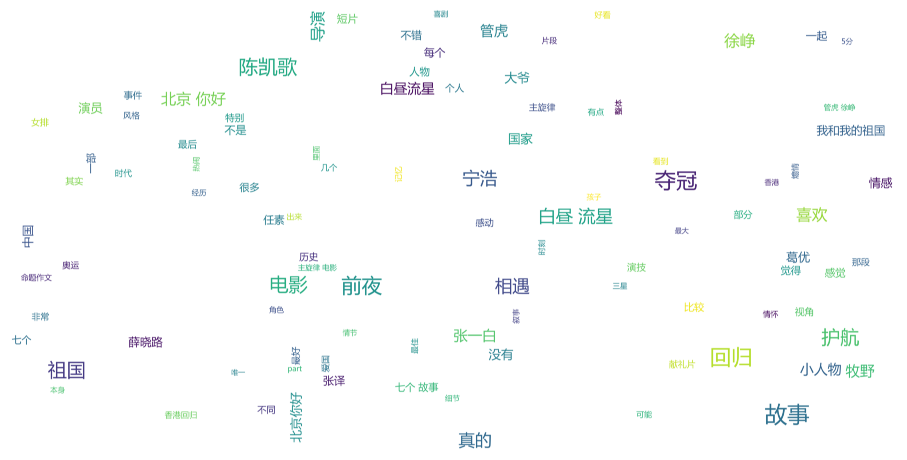

In [164]:
cut_text = open('ÊàëÂíåÊàëÁöÑÁ•ñÂõΩÁîµÂΩ±ËØÑËÆ∫.csv', 'r', encoding='utf-8').read()  # Âä†ËΩΩÂÜÖÂÆπ
wordcloud = WordCloud(
    height=8000,  # ËÆæÁΩÆÂõæÁâáÈ´òÂ∫¶
    width=16000,  # ËÆæÁΩÆÂõæÁâáÂÆΩÂ∫¶
    background_color='white',
    max_words=100,  # ËÆæÁΩÆÊúÄÂ§ßËØçÊï∞
    max_font_size=400,
    font_path="C:\Windows\Fonts\msyh.ttc",  # Â¶ÇÊúâÂè£Âûã‰π±Á†ÅÈóÆÈ¢ò,ÂèØËøõÂÖ•ÁõÆÂΩïÊõ¥Êç¢Â≠ó‰Ωì
).generate(cut_text)


plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')  # ÂéªÊéâÂùêÊ†áËΩ¥
plot.savefig('ËØÑËÆ∫È´òÈ¢ëËØç‰∫ëÂõæÁ§∫.png') #Â≠ò‰∏∫ÂõæÁâá
plot.show()        #Áõ¥Êé•ÊòæÁ§∫

## 2.2 ÊñáÊ°£-ËØçÈ°πÁü©ÈòµÔºàËØçË¢ãÊ®°ÂûãÔºâ

In [11]:
comment_part_list[0]

'Â∞è‰ºôÂ≠ê ÊÉ≥ Â•≥Â≠© Ë°®Ëææ Áà±ÊÑè ÊúâÂ§™Â§ö ÁîúË®ÄËúúËØ≠ ËÆ≤ ‰∏É‰∏™ Â∞è‰ºôÂÑø ‰∏ÄÊã•ËÄå‰∏ä Ë°®ÁôΩ Áà±Áà±Áà± Âê¨ ‰∏çÂà∞ Â£∞Èü≥ ÊÖ∑ÊÖ®ÊøÄÊòÇ Á©∫Ê¥û ËãçÁôΩ '

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
comment_part_ndarray = np.array(comment_part_list)
statistics_bwm = CountVectorizer(min_df=0., max_df=1.)
comment_vectorization_bwm_ndarray = statistics_bwm.fit_transform(comment_part_ndarray).toarray()

In [8]:
comment_vectorization_bwm_ndarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
print(statistics_bwm.fit_transform(comment_part_ndarray))

  (0, 2073)	2
  (0, 2408)	1
  (0, 2639)	1
  (0, 2588)	1
  (0, 1550)	1
  (1, 2588)	1
  (1, 1179)	1
  (1, 2216)	1
  (1, 1228)	1
  (1, 2229)	1
  (1, 1557)	1
  (1, 1593)	1
  (2, 2073)	1
  (2, 586)	3
  (2, 393)	2
  (2, 1543)	1
  (2, 961)	1
  (2, 917)	2
  (2, 1942)	1
  (2, 2396)	1
  (2, 1398)	1
  (2, 1071)	1
  (2, 77)	1
  (2, 2579)	1
  (2, 2136)	1
  :	:
  (199, 1060)	1
  (199, 2305)	2
  (199, 257)	1
  (199, 725)	1
  (199, 2289)	1
  (199, 1499)	1
  (199, 2677)	1
  (199, 2157)	1
  (199, 2681)	1
  (199, 2673)	1
  (199, 96)	1
  (199, 735)	1
  (199, 1939)	1
  (199, 1226)	1
  (199, 653)	1
  (199, 2203)	1
  (199, 1151)	2
  (199, 2150)	1
  (199, 1676)	1
  (199, 306)	1
  (199, 1078)	1
  (199, 400)	1
  (199, 126)	1
  (199, 2461)	1
  (199, 2137)	1


In [10]:
statistics_bwm.vocabulary_.get("‰∏≠ÂõΩ")

233

In [12]:
statistics_bwm.inverse_transform(statistics_bwm.fit_transform(comment_part_ndarray))

[array(['Á´üÁÑ∂', 'Ë∂ÖÂá∫', 'È¢ÑÊúü', 'ÈôàÂáØÊ≠å', 'ÊúÄÂ∑Æ'], dtype='<U8'),
 array(['ÈôàÂáØÊ≠å', 'ÂæêÂ≥•', 'ËÉúÂá∫', 'ÊÄªÂØºÊºî', 'Ëá™ÂëäÂ•ãÂãá', 'ÊúÄÁÉÇ', 'Êú¨Â≠ê'], dtype='<U8'),
 array(['Á´üÁÑ∂', 'Âåó‰∫¨', '‰Ω†Â•Ω', 'ÊúÄ‰Ω≥', 'ÂÆÅÊµ©', 'Â••Ëøê‰ºö', 'ÁõõÂ§ß', 'Ëµõ‰∫ã', 'Êé•Âú∞', 'Â∏¶Ê≥™', '‰∏ÄÂº†',
        'Èó®Á•®', 'Á∫øÁ¥¢', 'Â∑ßÂ¶ô', '‰∏≤Ëµ∑', '2008', '‰∏Ä‰ª∂', 'Ë°®Èù¢', 'ÂñúÂâß', 'ÂÜÖÊ†∏', 'ÂÖ∂ÂÆû', 'ÊÇ≤Ââß',
        'ÂâçÂ§ú', 'Ê¨°‰πã', '‰ª•‰∏∫', 'Ê≤°Êúâ', '‰∫∫ÁêÜ', 'ÊâÄÊúâ‰∫∫', 'ÁªµËñÑ‰πãÂäõ', 'ÁÉüÊñó', 'Âã∫Â≠ê', 'ÈìÅÈî§',
        'ÈïøÂëΩÈîÅ', 'Áû¨Èó¥', 'Ê≥™Â¥©', 'Â§∫ÂÜ†', 'Á±ª‰ºº', 'ÈÄèËøá', 'ËÄÅÁôæÂßì', 'ËßÜËßí', 'ÂèçÊò†', 'Êó∂‰ª£', '‰∫ã‰ª∂',
        '‰∏ªËßí', '‰∏çÊòØ', '‰ºü‰∫∫', 'ËΩ∞ËΩ∞ÁÉàÁÉà', 'Â£Æ‰∏æ', 'ÊúÄËÉΩ', 'ÂÖ±È∏£', 'ÁôΩÊòº', 'ÊµÅÊòü', 'ÂÄüÂä©', 'Ëà™Â§©',
        'Êé¢ËÆ®', 'Ë¥´ÂØåÂ∑ÆË∑ù', 'Âπ¥‰ª£', '‰∫∫Á±ª', 'Â∑≤Áªè', 'ËøõÂÖ•', 'Â§™Á©∫', 'Áúã‰∏çËµ∑', '‰π∞‰∏çËµ∑', 'Ë°£Êúç',
        'Êâ∂Ë¥´', '‰∏ç‰ªÖ‰ªÖ', 'Âú®‰∫é', 'Áâ©Ë¥®', 'Â±ÇÈù¢', 'ÈáçË¶Å', 'ÊïôËÇ≤', 'ÊÄùÊÉ≥', 'ÂÆáÂÆ

In [13]:
comment_vectorization_bwm_df = pd.DataFrame(comment_vectorization_bwm_ndarray, columns=statistics_bwm.get_feature_names())
comment_vectorization_bwm_df.index = comment_df['Name']
comment_vectorization_bwm_df.to_csv('ËØÑËÆ∫-ËØçÈ°πÁü©Èòµ.csv',encoding="utf_8_sig") 
comment_vectorization_bwm_df

00  08  10  15  155  16  20  2008  2009  21  ...  ÈªÑÊ∏§  ÈªÑÊ∏§ÂÆã‰Ω≥  ÈªÑËâ≤  ÈªëËâ≤ÂπΩÈªò  \
Name                                                  ...                       
ÊñáÂàÄÂ§ßÂúüÁî≥     0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
È∫ªÁª≥        0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
ÂáåÁùø        0   0   0   0    0   0   0     1     0   0  ...   0     0   0     0   
Not dry   0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
Ë•øÊ•ºÂ∞ò       0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
...      ..  ..  ..  ..  ...  ..  ..   ...   ...  ..  ...  ..   ...  ..   ...   
Ëá™Âú®Â¶ÇÈ£éÁöÑÔºå    0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
ÊúùÈò≥Âå∫ÈôÜ‰æùËêç    0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
ÁÑ¶Á≥ñÂ∞èÈ≠îÊÄ™     0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
‰º™Êñá‰∫∫ÊÉ≥ÊëáÊªö    0   0   0   0    0   0   0     0     0   0  ...   0     0   0     0   
ÈÉ≠Â≠ê        0   0   0   0    0   0   0     0     0   0  ...   0     0   0     1   

         ÈªòÈªòÊó†Èóª  ÈªØÊ∑°Êó†ÂÖâ  ÈºìÊéå  ÈºªÂ≠ê  ÈΩêËÅö  ÈΩêÈ£û  
Name                                 
ÊñáÂàÄÂ§ßÂúüÁî≥       0     0   0   0   0   0  
È∫ªÁª≥          0     0   0   0   0   0  
ÂáåÁùø          0     0   0   0   0   0  
Not dry     0     0   0   0   0   0  
Ë•øÊ•ºÂ∞ò         0     0   0   0   0   0  
...       ...   ...  ..  ..  ..  ..  
Ëá™Âú®Â¶ÇÈ£éÁöÑÔºå      0     0   0   0   0   0  
ÊúùÈò≥Âå∫ÈôÜ‰æùËêç      0     0   0   0   0   0  
ÁÑ¶Á≥ñÂ∞èÈ≠îÊÄ™       0     0   0   0   0   0  
‰º™Êñá‰∫∫ÊÉ≥ÊëáÊªö      0     0   0   0   1   0  
ÈÉ≠Â≠ê          0     0   0   0   0   0  

[200 rows x 2700 columns]

## 2.3 ËøêÁî®ËØçË¢ãÊ®°ÂûãËøõË°åÊñáÊú¨ÂêëÈáèÂåñÔºà‰∏§ËØçÔºâ

In [14]:
corpus = ['Âåó‰∫¨ ‰∏≠ÂõΩ È¶ñÈÉΩ',
'‰∏≠ÂõΩ È¶ñÈÉΩ Âåó‰∫¨']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [15]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2

array([[1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1]], dtype=int64)

In [16]:
bigram_vectorizer.get_feature_names()

['‰∏≠ÂõΩ', '‰∏≠ÂõΩ È¶ñÈÉΩ', 'Âåó‰∫¨', 'Âåó‰∫¨ ‰∏≠ÂõΩ', 'È¶ñÈÉΩ', 'È¶ñÈÉΩ Âåó‰∫¨']

In [17]:
statistics_b2gm = CountVectorizer(ngram_range=(2,2))
comment_vectorization_b2gm_ndarray = statistics_b2gm.fit_transform(comment_part_ndarray).toarray()
comment_vectorization_b2gm_ndarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
comment_vectorization_b2gm_df = pd.DataFrame(comment_vectorization_b2gm_ndarray, columns=statistics_b2gm.get_feature_names())
comment_vectorization_b2gm_df.index = comment_df['Name']
comment_vectorization_b2gm_df.to_csv('ËØÑËÆ∫-ËØçÈ°πÁü©Èòµ(ÂèåËØçÔºâ.csv',encoding="utf_8_sig") 
comment_vectorization_b2gm_df

00 ÊÑüËßâ  08 ÂèØËÉΩ  08 Â••Ëøê  08 Â••Ëøê‰ºö  08 ÊÉÖËäÇ  08 ÁúüÁöÑ  10 20  10 ÂÆÅÊµ©  15 ÊäóÊàò  \
Name                                                                      
ÊñáÂàÄÂ§ßÂúüÁî≥        0      0      0       0      0      0      0      0      0   
È∫ªÁª≥           0      0      0       0      0      0      0      0      0   
ÂáåÁùø           0      0      0       0      0      0      0      0      0   
Not dry      0      0      0       0      0      0      0      0      0   
Ë•øÊ•ºÂ∞ò          0      0      0       0      0      0      0      0      0   
...        ...    ...    ...     ...    ...    ...    ...    ...    ...   
Ëá™Âú®Â¶ÇÈ£éÁöÑÔºå       0      0      0       0      0      0      0      0      0   
ÊúùÈò≥Âå∫ÈôÜ‰æùËêç       0      0      0       0      0      0      0      0      0   
ÁÑ¶Á≥ñÂ∞èÈ≠îÊÄ™        0      0      0       0      0      0      0      0      0   
‰º™Êñá‰∫∫ÊÉ≥ÊëáÊªö       0      0      0       0      0      0      0      0      0   
ÈÉ≠Â≠ê           0      0      0       0      0      0      0      0      0   

         155 ÂàÜÈíü  ...  ÈªëËâ≤ÂπΩÈªò Áúã‰∏äÂéª  ÈªëËâ≤ÂπΩÈªò È£éÊ†º  ÈªòÈªòÊó†Èóª ÊûÑÂª∫  ÈªØÊ∑°Êó†ÂÖâ Â§∫ÂÜ†  ÈºìÊéå Âåó‰∫¨  ÈºìÊéå ÊÜãÁùÄ  \
Name             ...                                                      
ÊñáÂàÄÂ§ßÂúüÁî≥         0  ...         0        0        0        0      0      0   
È∫ªÁª≥            0  ...         0        0        0        0      0      0   
ÂáåÁùø            0  ...         0        0        0        0      0      0   
Not dry       0  ...         0        0        0        0      0      0   
Ë•øÊ•ºÂ∞ò           0  ...         0        0        0        0      0      0   
...         ...  ...       ...      ...      ...      ...    ...    ...   
Ëá™Âú®Â¶ÇÈ£éÁöÑÔºå        0  ...         0        0        0        0      0      0   
ÊúùÈò≥Âå∫ÈôÜ‰æùËêç        0  ...         0        0        0        0      0      0   
ÁÑ¶Á≥ñÂ∞èÈ≠îÊÄ™         0  ...         0        0        0        0      0      0   
‰º™Êñá‰∫∫ÊÉ≥ÊëáÊªö        0  ...         0        0        0        0      0      0   
ÈÉ≠Â≠ê            0  ...         0        1        0        0      0      0   

         ÈºìÊéå Ë∫´Ëæπ  ÈºªÂ≠ê Ê≥õÈÖ∏  ÈΩêËÅö È£ûÂÆá  ÈΩêÈ£û ‰∏ªÊóãÂæã  
Name                                  
ÊñáÂàÄÂ§ßÂúüÁî≥        0      0      0       0  
È∫ªÁª≥           0      0      0       0  
ÂáåÁùø           0      0      0       0  
Not dry      0      0      0       0  
Ë•øÊ•ºÂ∞ò          0      0      0       0  
...        ...    ...    ...     ...  
Ëá™Âú®Â¶ÇÈ£éÁöÑÔºå       0      0      0       0  
ÊúùÈò≥Âå∫ÈôÜ‰æùËêç       0      0      0       0  
ÁÑ¶Á≥ñÂ∞èÈ≠îÊÄ™        0      0      0       0  
‰º™Êñá‰∫∫ÊÉ≥ÊëáÊªö       0      0      1       0  
ÈÉ≠Â≠ê           0      0      0       0  

[200 rows x 5777 columns]

## 2.4 ËøêÁî®TF-IDFÊ®°ÂûãËøõË°åÊñáÊú¨ÂêëÈáèÂåñ

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

statistics_tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',use_idf=True, smooth_idf=True)
comment_vectorization_tv_ndarray = statistics_tv.fit_transform(comment_part_ndarray).toarray()
comment_vectorization_tv_ndarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20681782,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
comment_vectorization_tv_df = pd.DataFrame(np.round(comment_vectorization_tv_ndarray, 2), columns=statistics_tv.get_feature_names())
comment_vectorization_tv_df.to_csv('ËØçÈ¢ë-ÈÄÜÂêëÊñáÊ°£È¢ëÁéá(TF-IDF ModelÔºâ.csv',encoding="utf_8_sig")
comment_vectorization_tv_df

00   08   10   15  155   16   20  2008  2009   21  ...   ÈªÑÊ∏§  ÈªÑÊ∏§ÂÆã‰Ω≥   ÈªÑËâ≤  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.11   0.0  0.0  ...  0.0   0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  ...   ...  ...   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   
199  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   0.0  0.0  ...  0.0   0.0  0.0   

     ÈªëËâ≤ÂπΩÈªò  ÈªòÈªòÊó†Èóª  ÈªØÊ∑°Êó†ÂÖâ   ÈºìÊéå   ÈºªÂ≠ê    ÈΩêËÅö   ÈΩêÈ£û  
0    0.00   0.0   0.0  0.0  0.0  0.00  0.0  
1    0.00   0.0   0.0  0.0  0.0  0.00  0.0  
2    0.00   0.0   0.0  0.0  0.0  0.00  0.0  
3    0.00   0.0   0.0  0.0  0.0  0.00  0.0  
4    0.00   0.0   0.0  0.0  0.0  0.00  0.0  
..    ...   ...   ...  ...  ...   ...  ...  
195  0.00   0.0   0.0  0.0  0.0  0.00  0.0  
196  0.00   0.0   0.0  0.0  0.0  0.00  0.0  
197  0.00   0.0   0.0  0.0  0.0  0.00  0.0  
198  0.00   0.0   0.0  0.0  0.0  0.21  0.0  
199  0.12   0.0   0.0  0.0  0.0  0.00  0.0  

[200 rows x 2700 columns]

## 2.5  ÊèêÂèñÊñ∞ËØÑËÆ∫ÁöÑÁâπÂæÅ

In [52]:
new_doc = 'È¶ôÊ∏Ø Á•ñÂõΩ Á∫¢Ëâ≤ ‰∫îÊòüÁ∫¢Êóó Âõ¢Áªì ÊÑü‰∫∫ Ëã¶‰∫Ü ‰∏≠ÂçéÂÑøÂ•≥ 2008 ÈôàÂáØÊ≠å ÂæêÂ≥• ÈªÑÊ∏§ Áî∑Â≠© Â••Ëøê Â•≥Êéí'

In [53]:
new_comment_vectorization_tv_df = pd.DataFrame(np.round(statistics_tv.transform([new_doc]).toarray(), 2), 
             columns=statistics_tv.get_feature_names())
new_comment_vectorization_tv_df.to_csv('Êñ∞ËØÑËÆ∫ÁâπÂæÅÂêëÈáèÊèêÂèñ.csv',encoding="utf_8_sig")
new_comment_vectorization_tv_df

00   08   10   15  155   16   20  2008  2009   21  ...    ÈªÑÊ∏§  ÈªÑÊ∏§ÂÆã‰Ω≥   ÈªÑËâ≤  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.37   0.0  0.0  ...  0.32   0.0  0.0   

   ÈªëËâ≤ÂπΩÈªò  ÈªòÈªòÊó†Èóª  ÈªØÊ∑°Êó†ÂÖâ   ÈºìÊéå   ÈºªÂ≠ê   ÈΩêËÅö   ÈΩêÈ£û  
0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  

[1 rows x 2700 columns]

# 3ÔºöÊñáÊú¨Áõ∏‰ººÂ∫¶ÂàÜÊûê

## 3.1 ËÆ°ÁÆóÁõ∏‰ººÂ∫¶Áü©Èòµ

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(comment_vectorization_tv_ndarray)
comment_similarity_df = pd.DataFrame(similarity_matrix)
comment_similarity_df.to_csv('ËØÑËÆ∫Áõ∏‰ººÂ∫¶Áü©Èòµ.csv',encoding="utf_8_sig")
comment_similarity_df

0         1         2    3         4         5         6    \
0    1.000000  0.034259  0.074656  0.0  0.000000  0.104814  0.012430   
1    0.034259  1.000000  0.000000  0.0  0.000000  0.000000  0.029993   
2    0.074656  0.000000  1.000000  0.0  0.055835  0.040822  0.038445   
3    0.000000  0.000000  0.000000  1.0  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.055835  0.0  1.000000  0.011165  0.034981   
..        ...       ...       ...  ...       ...       ...       ...   
195  0.065637  0.000000  0.075882  0.0  0.014230  0.034285  0.009258   
196  0.000000  0.000000  0.012586  0.0  0.000000  0.000000  0.000000   
197  0.000000  0.000000  0.057454  0.0  0.000000  0.000000  0.000000   
198  0.000000  0.020676  0.018632  0.0  0.017475  0.000000  0.060569   
199  0.009522  0.022977  0.069741  0.0  0.007720  0.040923  0.070718   

          7         8         9    ...       190       191  192       193  \
0    0.008618  0.008128  0.032840  ...  0.000000  0.000000  0.0  0.010685   
1    0.020794  0.008694  0.035129  ...  0.000000  0.000000  0.0  0.011429   
2    0.020000  0.016752  0.009695  ...  0.000000  0.066484  0.0  0.007510   
3    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.000000   
4    0.008851  0.000000  0.000000  ...  0.000000  0.014377  0.0  0.019092   
..        ...       ...       ...  ...       ...       ...  ...       ...   
195  0.064459  0.062956  0.000000  ...  0.008172  0.088912  0.0  0.007354   
196  0.000000  0.040795  0.000000  ...  0.009831  0.012365  0.0  0.000000   
197  0.034638  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.000000   
198  0.036520  0.040807  0.017757  ...  0.008839  0.011118  0.0  0.030529   
199  0.081923  0.081464  0.031735  ...  0.014335  0.108324  0.0  0.041228   

          194       195       196       197       198       199  
0    0.000000  0.065637  0.000000  0.000000  0.000000  0.009522  
1    0.000000  0.000000  0.000000  0.000000  0.020676  0.022977  
2    0.047782  0.075882  0.012586  0.057454  0.018632  0.069741  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.028577  0.014230  0.000000  0.000000  0.017475  0.007720  
..        ...       ...       ...       ...       ...       ...  
195  0.007442  1.000000  0.026288  0.000000  0.019320  0.146432  
196  0.008952  0.026288  1.000000  0.015285  0.008095  0.024897  
197  0.000000  0.000000  0.015285  1.000000  0.043363  0.008503  
198  0.033185  0.019320  0.008095  0.043363  1.000000  0.072407  
199  0.061643  0.146432  0.024897  0.008503  0.072407  1.000000  

[200 rows x 200 columns]

## 3.2 Áõ∏‰ººÂ∫¶Áü©ÈòµÁÉ≠ÂäõÂõæÂèØËßÜÂåñ

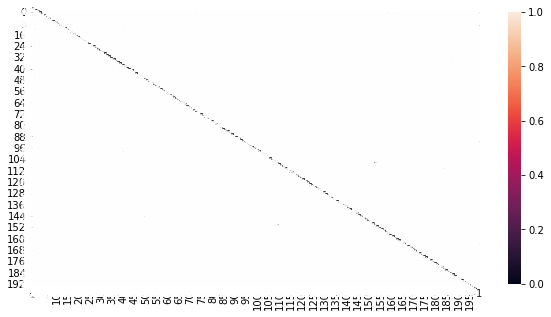

In [55]:
import matplotlib.pyplot as plot
import seaborn as sns
f,ax = plot.subplots(figsize=(10,5))
sns.heatmap(similarity_matrix,annot=True)

# 4ÔºöËØÑËÆ∫ÂàÜÁ±ª

## 4.1 ÔºöÊîØÊåÅÂêëÈáèÊú∫ÔºàSVMÔºâÂéüÁêÜ

In [21]:
def produce_data(n_points=1000):

    data = pd.DataFrame()
    
    # ÁîüÊàêËôöÊãüÁ†îÁ©∂Êï∞ÊçÆ
    np.random.seed(0)
    # ÁîüÊàêÂ≠¶‰π†ÁâπÂæÅ
    data['practice'] = np.random.random(n_points)
    data['time_period'] = np.random.random(n_points)
    data['error'] = np.random.random(n_points)
    # ÁîüÊàêÁ±ªÂà´Ê†áÁ≠æ
    data['label'] = np.round(data['practice']*data['time_period'] + 0.3 + 0.1*data['error'])
    data['label'][data['practice']>0.8] = 1
    data['label'][data['time_period']>0.8] = 1
    
    return(data)


def plot_pic(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # ÁîªÂá∫ÂÜ≥Á≠ñËæπÁïåÔºåÊàë‰ª¨‰∏∫ÊØè‰∏Ä‰∏™ÁÇπÁªòÂà∂‰∏Ä‰∏™È¢úËâ≤

    step = .01  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # ÁªòÂõæ
    Z = Z.reshape(xx.shape)
    plot.xlim(xx.min(), xx.max())
    plot.ylim(yy.min(), yy.max())

    plot.pcolormesh(xx, yy, Z, cmap=plot.cm.RdYlBu)


    data = X_test.copy()
    data['label'] = y_test
    
    practice_fail = data[data['label']==0]['practice']
    time_period_fail = data[data['label']==0]['time_period']
    practice_pass = data[data['label']==1]['practice']
    time_period_pass = data[data['label']==1]['time_period']


    plot.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
    plot.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
    plot.legend()
    plot.xlabel('practice')
    plot.ylabel('time_period')
    plot.legend(loc='upper right')

In [22]:
# ÁîüÊàêÊµãËØïÊï∞ÊçÆÈõÜ
data = produce_data()

In [23]:
data.head()

practice  time_period     error  label
0  0.548814     0.592880  0.811518    1.0
1  0.715189     0.010064  0.476084    0.0
2  0.602763     0.475826  0.523156    1.0
3  0.544883     0.708770  0.250521    1.0
4  0.423655     0.043975  0.605043    0.0

In [24]:
# ÂáÜÂ§áËÆ≠ÁªÉÈõÜÔºåÊµãËØïÈõÜÊï∞ÊçÆÔºå
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = \
train_test_split(data[['practice', 'time_period']], data['label'], test_size=0.25)

In [25]:
#ÊääËÆ≠ÁªÉÈõÜÁöÑÂ±ûÊÄßÂíåÊ†áÁ≠æÂêàÂπ∂Âú®‰∏ÄËµ∑Ôºõ
train_data = features_train.copy()     
train_data['label'] = label_train
train_data.head()

practice  time_period  label
340  0.370853     0.258059    0.0
821  0.000546     0.340605    0.0
154  0.123820     0.800256    1.0
985  0.492361     0.342226    1.0
996  0.514922     0.721198    1.0

In [26]:
train_data.to_csv('SVMÁÆóÊ≥ïËÆ≠ÁªÉÊ†∑Êú¨.csv',encoding="utf_8_sig") 

In [27]:
#‰∏∫‰∫ÜÁîªÂõæÂÅöÂáÜÂ§áÔºåÊääËÆ≠ÁªÉÈõÜ‰∏≠Ê†áÁ≠æÊòØfailÂíåpassÁöÑÁªôÂàÜÂºÄÁ≠õÈÄâÂá∫Êù•Ôºõ
practice_fail = train_data[train_data['label']==0]['practice']
time_period_fail = train_data[train_data['label']==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

In [28]:
# Êï∞ÊçÆÈõÜÂõæÂΩ¢ÂèØËßÜÂåñ
plot.figure(figsize = (6,5))
plot.xlim(0.0, 1.0)
plot.ylim(0.0, 1.0)
plot.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
plot.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
plot.xlabel('practice')
plot.ylabel('time_period')
plot.legend(loc='upper right')

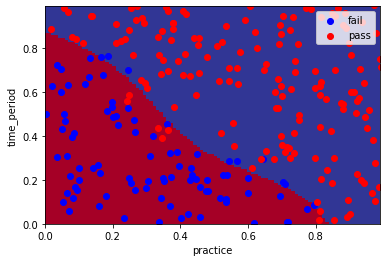

In [29]:
from sklearn.svm import SVC 

clf_SVC = SVC()                               #ÈªòËÆ§ÁöÑÊ†∏ÂáΩÊï∞Â∞±ÊòØrbfÔºõ
clf_SVC.fit(features_train,label_train)       #ËÆ≠ÁªÉÔºõ
pred_SVC = clf_SVC.predict(features_test)     #ËøîÂõûÊòØÊµãËØïÈõÜÁöÑÈ¢ÑÊµãÁöÑlabelÔºõ

plot_pic(clf_SVC, features_test, label_test)

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC, label_test)    #ÊãøÈ¢ÑÊµãÁöÑÊµãËØïÈõÜÁöÑlabelÂéªË∑üÁúüÂÆûÁöÑÊµãËØïÈõÜÁöÑlabelÂéªÊØîËæÉ„ÄÅÊâìÂàÜ
acc

0.94

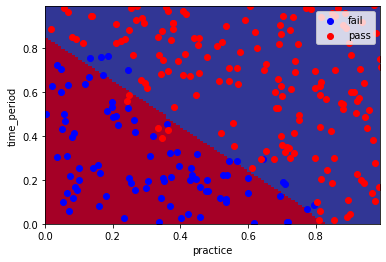

In [31]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'linear')
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.932

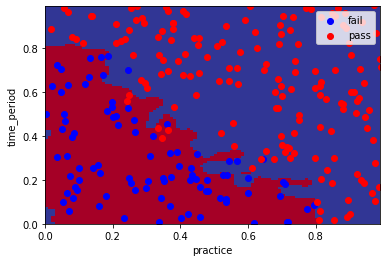

In [33]:
from sklearn.svm import SVC

clf_SVC3 = SVC(kernel = 'rbf',gamma = 1000 )      #ËÆæÂÆöÊ†∏ÂáΩÊï∞Á≥ªÊï∞gamma=1000
clf_SVC3.fit(features_train,label_train)
pred_SVC3 = clf_SVC3.predict(features_test)

plot_pic(clf_SVC3, features_test, label_test)

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC3, label_test)
acc

0.964

In [35]:
#‰∫∫Â∑•ÂØπÁà¨ÂèñÁöÑ200Êù°ËØÑËÆ∫ËøõË°åÂàÜÁ±ª
labels_true = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1]

In [36]:
from sklearn.svm import SVC 

clf_SVC = SVC()                               
clf_SVC.fit(pd.DataFrame(np.round(comment_vectorization_tv_ndarray, 2)),pd.Series(labels_true))       #ËÆ≠ÁªÉÔºõ


SVC()

### 4.2 SVMÂàÜÁ±ªÁÆóÊ≥ïÂ∫îÁî®ÔºàËá™Âä®ÁªôÊñ∞ËØÑËÆ∫ÂàÜÁ±ªÔºâ

In [37]:
new_doc = 'È¶ôÊ∏Ø Á•ñÂõΩ Á∫¢Ëâ≤ ‰∫îÊòüÁ∫¢Êóó Âõ¢Áªì ÊÑü‰∫∫ Ëã¶‰∫Ü ‰∏≠ÂçéÂÑøÂ•≥ 2008 ÈôàÂáØÊ≠å ÂæêÂ≥• ÈªÑÊ∏§ Áî∑Â≠© Â••Ëøê Â•≥Êéí'

In [38]:
new_comment_vectorization_tv_df = pd.DataFrame(np.round(statistics_tv.transform([new_doc]).toarray(), 2), 
             columns=statistics_tv.get_feature_names())
new_comment_vectorization_tv_df.to_csv('Êñ∞ËØÑËÆ∫ÁâπÂæÅÂêëÈáèÊèêÂèñ.csv',encoding="utf_8_sig")
new_comment_vectorization_tv_df

00   08   10   15  155   16   20  2008  2009   21  ...    ÈªÑÊ∏§  ÈªÑÊ∏§ÂÆã‰Ω≥   ÈªÑËâ≤  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.37   0.0  0.0  ...  0.32   0.0  0.0   

   ÈªëËâ≤ÂπΩÈªò  ÈªòÈªòÊó†Èóª  ÈªØÊ∑°Êó†ÂÖâ   ÈºìÊéå   ÈºªÂ≠ê   ÈΩêËÅö   ÈΩêÈ£û  
0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  

[1 rows x 2700 columns]

In [39]:
pred_SVC = clf_SVC.predict(new_comment_vectorization_tv_df)     #ËøîÂõûÊòØÊµãËØïÈõÜÁöÑÈ¢ÑÊµãÁöÑlabelÔºõ

In [40]:
pred_SVC

array([1], dtype=int64)

# 5ÔºöËØÑËÆ∫ËÅöÁ±ª

### 5.1Ôºök-means ËÅöÁ±ªÂéüÁêÜ

In [61]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [62]:
data = pd.read_csv('k-mean.csv')
print(data.shape)
data.head()

(3000, 2)


V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729

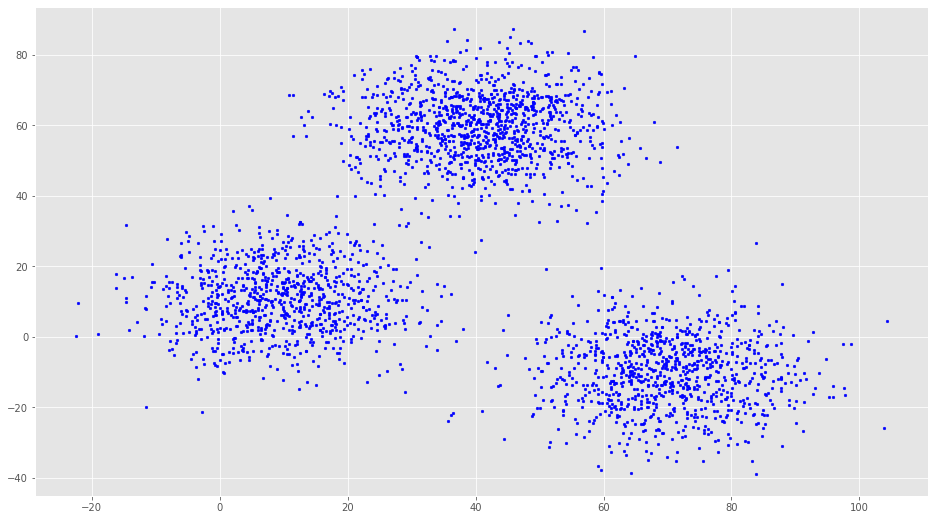

In [63]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='b', s=7)

In [64]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [65]:
k = 3
# ÈöèÊú∫ÈÄâÊã©‰∏≠ÂøÉÂùêÊ†á
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[25. 54.]
 [ 5. 51.]
 [22. 34.]]


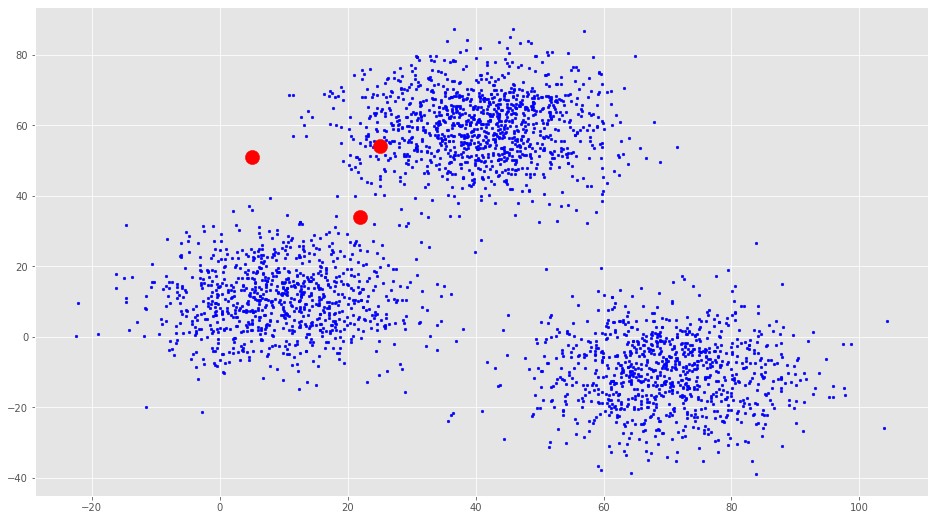

In [66]:
# Áîª‰∏≠ÂøÉÁÇπ
plt.scatter(f1, f2, c='b', s=7)
plt.scatter(C_x, C_y, marker='o', s=200, c='r')

In [67]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

error = dist(C, C_old, None)
# Âæ™ÁéØÁõ¥Âà∞ËØØÂ∑ÆËææÂà∞‰∏ÄÂÆöÁ≤æÂ∫¶
while error != 0:
    
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

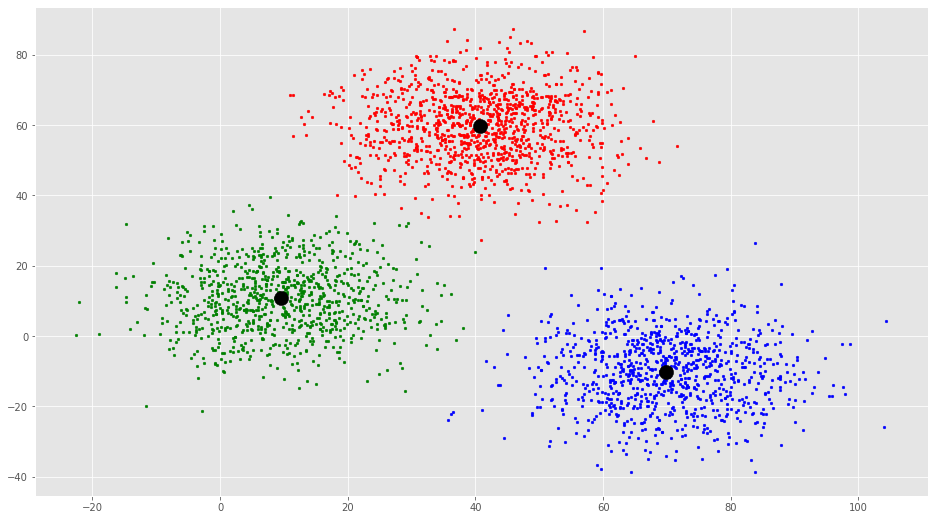

In [68]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', s=200, c='k')

In [69]:
X   #‰∏≠ÂøÉÁÇπÂùêÊ†á

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [71]:
print(C) 
print(centroids) 

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

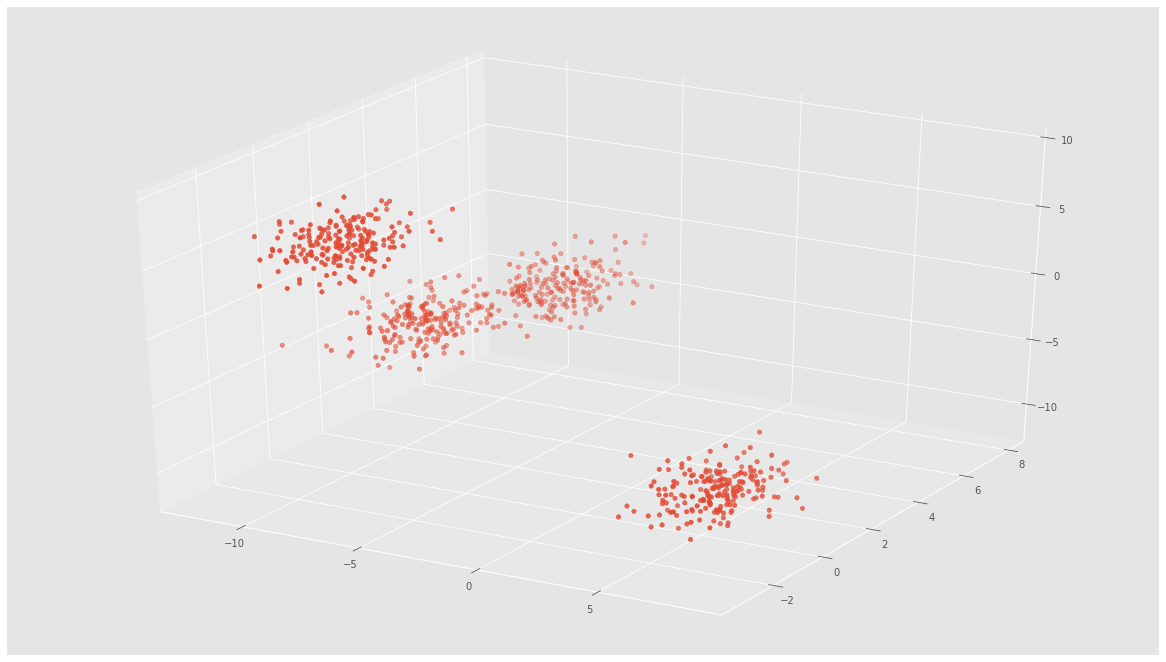

In [75]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

In [77]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='r', s=500)

In [78]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2)

In [79]:
kmeans.fit(comment_vectorization_tv_ndarray)

KMeans(n_clusters=2)

In [80]:
kmeans.cluster_centers_

array([[ 1.33584782e-03,  3.10133966e-03,  3.32133690e-03, ...,
        -2.81892565e-18,  1.44627844e-03,  1.09981325e-03],
       [-6.50521303e-19,  4.93956752e-03, -2.60208521e-18, ...,
         5.63589454e-03,  8.67361738e-19,  5.42101086e-19]])

In [81]:
kmeans.inertia_

191.92040189334642

In [91]:
kmeans.fit_predict(comment_vectorization_tv_ndarray)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1])

## 5.2 ËÅöÁ±ªÊïàÊûúËØÑ‰ª∑

In [162]:
from sklearn import metrics
# ‰∫∫Â∑•ËøõË°åÂàÜÁ±ª
labels_true = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1]
labels_pred = list(kmeans.fit_predict(comment_vectorization_tv_ndarray))
metrics.adjusted_rand_score(labels_true, labels_pred)

0.64473687437178